# Week6 - Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [2]:
#Distribution of the actual event.
actual_distribution = results['actual'].value_counts()
print(actual_distribution)


actual
1.0    3000
0.0    2000
Name: count, dtype: int64


### Observations
Yes, I would be concered about bias due the imbalance in the dataset as it produces skewed results and could have impact on the model performance thus leading to inefficient model.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

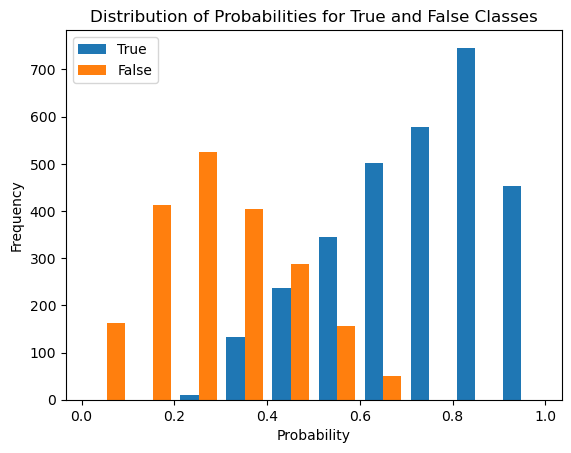

In [3]:
plt.hist([results[results['actual'] == 1.0]['prob'], results[results['actual'] == 0.0]['prob']], label=['True', 'False'])
plt.xlabel('Probability') 
plt.ylabel('Frequency')
plt.title('Distribution of Probabilities for True and False Classes')
plt.legend()
plt.show()

### Observations

The above histogram graph represents two sets True events and False events of the'prob' column. "True" columns are represented using "blue" and "False" as "orange".

We can observe that there is some overlap in the values range 0.2 to 0.6.

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [4]:
threshold = 0.5
predictions = results['prob'] >= threshold

In [5]:
confusion_matrix = pd.crosstab(results['actual'], predictions)

In [6]:
print(confusion_matrix)

prob    False  True 
actual              
0.0      1790    210
1.0       377   2623


### Observations
1. True Negatives: 1790 instances were correctly predicted as negative.
2. False Positives: 210 instances which are actually negative were incorrectly predicted as positive.
3. False Negatives: 377 instances that are postive were incorrectly predicted as negative.
4. True Positives : 2623 instances were correctly predicted as positive.

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [7]:
true_positive = ((results['actual'] == 1.0) & (predictions == 1)).sum()
true_negative = ((results['actual'] == 0.0) & (predictions == 0)).sum()
false_positive = ((results['actual'] == 0.0) & (predictions == 1)).sum()
false_negative = ((results['actual'] == 1.0) & (predictions == 0)).sum()


In [8]:
accuracy = (true_positive + true_negative) / len(results)
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)


In [9]:
#results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8826
Precision: 0.9258736321920226
Recall: 0.8743333333333333


### Observatrions
I would use "F1 Scores", "Precision", "Recall" and additionally "Confusion Matrix" as measure for model performance for following reasons:

1) Precision is useful when false positives are high
2) Recall measure focuses on the model's ability to detect poisitive cases.
3) F1 score is useful to consider a single metric to consider both precision and recall
4) Finally, confusion matrix gives us the insights to the distribution of True positives, True negatives, False positives and False negatives

ROC curve and AUC score are also useful in determining the model performance in this cases.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

In [33]:
tpr = true_positive / (true_positive + false_negative)
fpr = false_positive / (false_positive + true_negative)

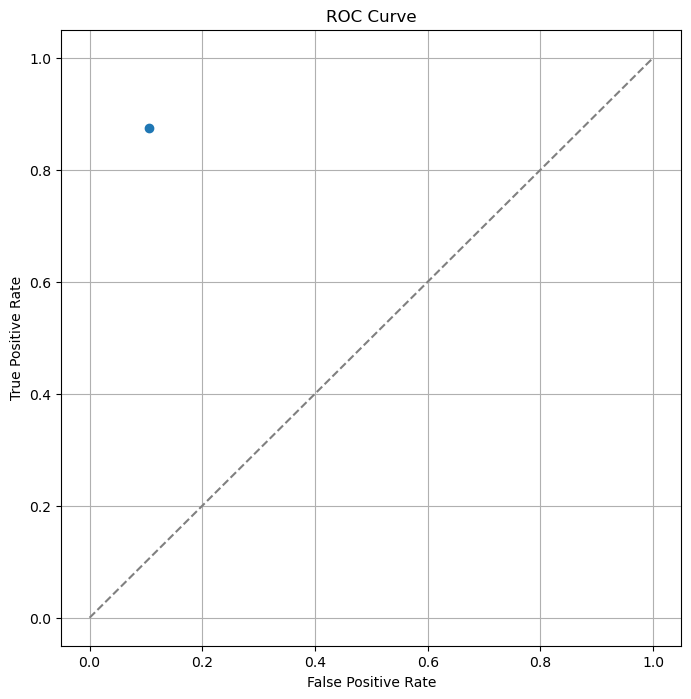

In [35]:
# Plotting  the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Observation
The above ROC curve representsthe model's performance, but it doesn't have a single "ideal" point. Instead, the performance of a model is assessed based on the entire curve or a summary metric such as the Area Under the Curve (AUC). Results shows the point towards the true positive side.